In [1]:
import warnings as _wrn
import numpy as _nmp
import numpy.random as _rnd
import matplotlib.pyplot as _plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

_wrn.filterwarnings('always')
_plt.style.use('ggplot')

In [3]:
import eQTLseq as _assoc

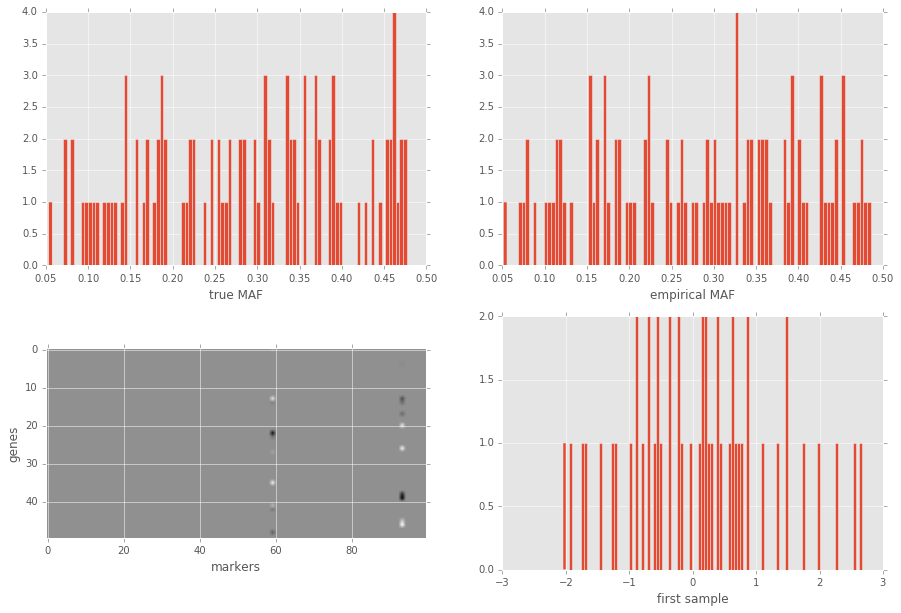

In [23]:
def fcn(n_samples, n_markers, n_markers_causal, n_genes, n_genes_affected, MAF_range, s2e, h2):
    data_geno = _assoc.simulate_genotypes(n_samples, n_markers, MAF_range)
    data_pheno = _assoc.simulate_phenotypes(data_geno['G'], mdl='Normal', n_markers_causal=n_markers_causal, n_genes=n_genes, n_genes_affected=n_genes_affected, s2e=s2e, h2=h2)

    _plt.figure(figsize = (15,10));
    _plt.subplot(2,2,1); _plt.hist(data_geno['MAF'], 100); _plt.xlabel('true MAF')
    _plt.subplot(2,2,2); _plt.hist(data_geno['G'].sum(0) / (2 * n_samples), 100);  _plt.xlabel('empirical MAF')
    _plt.subplot(2,2,3); _plt.imshow(data_pheno['coefs'], cmap=_plt.cm.gray); _plt.xlabel('markers'); _plt.ylabel('genes')
    _plt.subplot(2,2,4); _plt.hist(data_pheno['Y'][0,:], 100); _plt.xlabel('first sample');

    return data_geno, data_pheno

##
data_geno, data_pheno = fcn(n_samples = 1000, 
                            n_markers = 100, n_markers_causal = 2, 
                            n_genes = 50, n_genes_affected = 10,
                            MAF_range=[0.05, 0.5],
                            s2e = 1, h2 = 0.5)
    

In [24]:
loglik, estim = _assoc.run(data_pheno['Y'], data_geno['G'], n_iters = 1000)

1000 iterations (max):..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

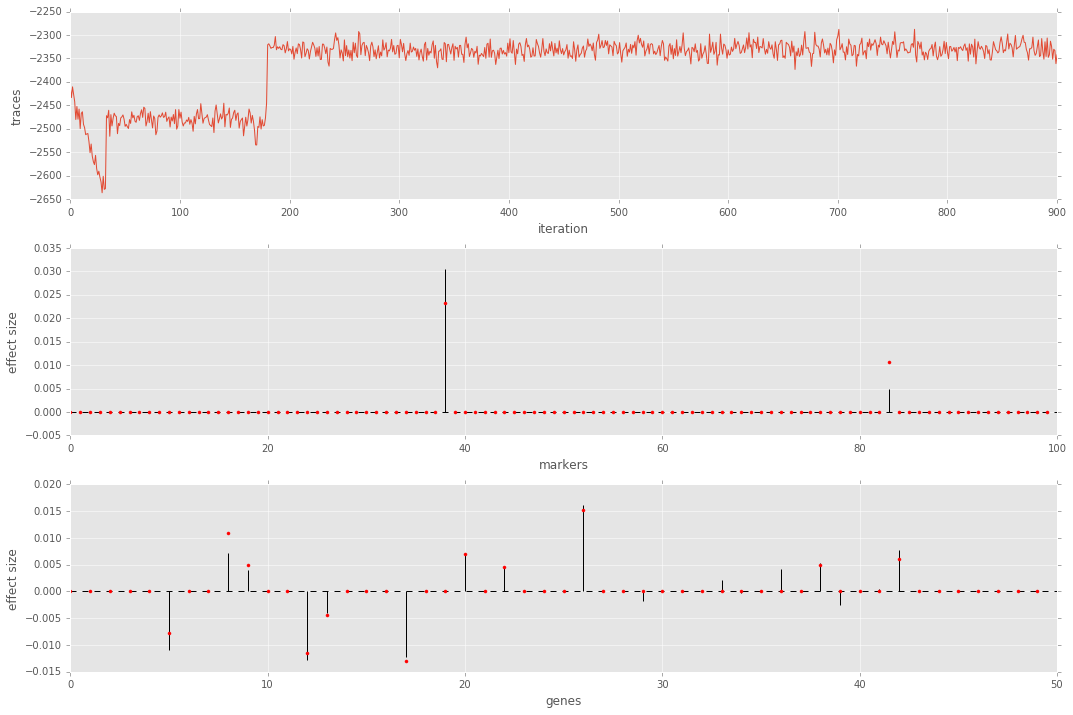

In [22]:
_plt.figure(figsize = (15,10));
_plt.subplot(3,1,1); _plt.plot(loglik[100:]); _plt.xlabel('iteration'); _plt.ylabel('traces')

_plt.subplot(3,1,2); 
_plt.vlines(range(data_pheno['coefs'].shape[1]), 0, _nmp.mean(data_pheno['coefs'], 0)); 
_plt.axhline(linestyle='--', color='k');
_plt.plot(_nmp.mean(estim['beta'], 0), 'r.'); _plt.xlabel('markers'); _plt.ylabel('effect size')

_plt.subplot(3,1,3); 
_plt.vlines(range(data_pheno['coefs'].shape[0]), 0, _nmp.mean(data_pheno['coefs'], 1)); 
_plt.axhline(linestyle='--', color='k');
_plt.plot(_nmp.mean(estim['beta'], 1), 'r.'); _plt.xlabel('genes'); _plt.ylabel('effect size')

_plt.tight_layout()

In [ ]:
tmp = {'a':1, 'b':2, 'c':3}
dict(**tmp, d=4, e=5)